# Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lm

# Loading Data

In [3]:

df_raw = pd.read_fwf('House_Rocket/altura_peso.txt')
df_raw.columns = ['altura', 'peso']
df_raw

,altura,peso
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162
5,71,156
6,71,169
7,72,165
8,73,181
9,75,208


In [237]:
#yhat = b0 + b1*x
X = df_raw['altura']
yhat01 = -190 + 5.13*X

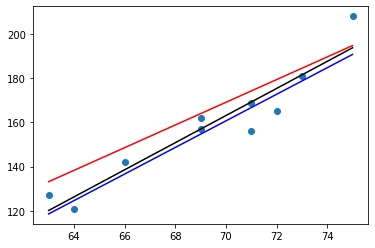

In [262]:
plt.scatter( df_raw['altura'], df_raw['peso'])
plt.plot(df_raw['altura'], yhat01, color='red')
plt.plot(df_raw['altura'], yhat02, color='blue')
plt.plot(df_raw['altura'], yhat03, color='black')

In [261]:
#yhat = b0 + b1*X
X = df_raw['altura']
yhat01 = -190 + 5.13*X
yhat02 = -260 + 6.01*X
yhat03 = -266 + 6.13*X

In [232]:
yhat01

0    133.19
1    138.32
2    148.58
3    163.97
4    143.45
5    174.23
6    174.23
7    179.36
8    179.36
9    179.36
Name: altura, dtype: float64

In [233]:
yhat02

0    118.63
1    124.64
2    136.66
3    154.69
4    130.65
5    166.71
6    166.71
7    172.72
8    172.72
9    172.72
Name: altura, dtype: float64

In [255]:
# Least Square Error
df1 = df_raw.copy()
df1['yhat01'] = yhat01
df1['yhat02'] = yhat02

# error
df1['error01'] = (df1['peso']-df1['yhat01'])**2
df1['error02'] = (df1['peso']-df1['yhat02'])**2

print( 'SS M01: {}'.format( np.sum(df1['error01'] )))
print( 'SS M02: {}'.format( np.sum(df1['error02'] )))
      

SS M01: 1187.6947000000002
SS M02: 652.8562999999997


In [253]:
df1

,altura,peso,yhat01,yhat02,error01,error02
0,63,127,133.19,118.63,38.3161,70.0569
1,64,121,138.32,124.64,299.9824,13.2496
2,66,142,148.58,136.66,43.2964,28.5156
3,69,157,163.97,154.69,48.5809,5.3361
4,69,162,163.97,154.69,3.8809,53.4361
5,71,156,174.23,166.71,332.3329,114.7041
6,71,169,174.23,166.71,27.3529,5.2441
7,72,165,179.36,172.72,206.2096,59.5984
8,73,181,184.49,178.73,12.1801,5.1529
9,75,208,194.75,190.75,175.5625,297.5625


In [258]:
# model definition
X = np.array(df_raw['altura']).reshape(-1,1)
y = np.array(df_raw['peso']).reshape(-1,1)

model_lm = lm.LinearRegression()

# model training
model_lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [260]:
print( 'b1: {}'.format(model_lm.coef_))
print('b0: {}'.format(model_lm.intercept_))

b1: [[6.13758146]]
b0: [-266.53439537]


In [263]:
altura01 = 71
peso01 = -266.53 + 6.14*altura01
peso01

169.41000000000003

In [264]:
altura02 = 72
peso02 = -266.53 + 6.14*altura02
peso02

175.55

In [265]:
175.55 - 169.41

6.140000000000015